In [62]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze  
from copy import deepcopy

# Wilson's Algorithm
## How does it work
Algorithm chooses a random cell and marks it visited, then starts from any unvisited cell and draws an entirely random path till the visited cell, erasing loops from intersecting paths. This way, it continues till all cells have been visited.


In [82]:
class GridElement:
    def __init__(self,x,y):
        self.x = x
        self.y = y

In [185]:
def wilson(maze):
    vis = []
    for i in range(0, maze.num_rows):
        vis.append(list(bytearray(maze.num_columns)))
    total_cells = maze.num_rows * maze.num_columns
    vis[0][0] = 1
    unvisited_cells = total_cells-1
    possible_directions = ['N','W','S','E']
    while unvisited_cells>0:
        last_visited_cell = GridElement((random.randint(0,maze.num_rows-1)),(random.randint(0,maze.num_columns-1)))
        while vis[last_visited_cell.y][last_visited_cell.x]:
            last_visited_cell = GridElement((random.randint(0,maze.num_rows-1)),(random.randint(0,maze.num_columns-1)))
        walked_path = []
        temp_visited_cells = []
        for i in range(0, maze.num_rows):
            temp_visited_cells.append(list(bytearray(maze.num_columns)))
        temp_visited_cells[last_visited_cell.y][last_visited_cell.x] = 1
        while vis[last_visited_cell.y][last_visited_cell.x] == 0:
            random_direction = possible_directions[random.randint(0,3)]
            if random_direction == 'N':
                if last_visited_cell.y-1<0:
                    continue
                walked_path.append([last_visited_cell.y,last_visited_cell.x,random_direction])
                last_visited_cell.y -= 1
            elif random_direction == 'W':
                if last_visited_cell.x-1<0:
                    continue
                walked_path.append([last_visited_cell.y,last_visited_cell.x,random_direction])
                last_visited_cell.x -= 1
            elif random_direction == 'S':
                if last_visited_cell.y+1>(maze.num_rows-1):
                    continue
                walked_path.append([last_visited_cell.y,last_visited_cell.x,random_direction])
                last_visited_cell.y += 1
            elif random_direction == 'E':
                if last_visited_cell.x+1>(maze.num_columns-1):
                    continue
                walked_path.append([last_visited_cell.y,last_visited_cell.x,random_direction])
                last_visited_cell.x += 1
            if vis[last_visited_cell.y][last_visited_cell.x] == 1:
                break
            if temp_visited_cells[last_visited_cell.y][last_visited_cell.x] == 1:
                top = len(walked_path)-1
                while len(walked_path)>0 and walked_path[top][0]!=last_visited_cell.y and walked_path[top][1]!=last_visited_cell.x:
                    temp_visited_cells[walked_path[top][0]][walked_path[top][1]] = 0
                    walked_path.pop()
                    top -= 1
                if len(walked_path)>0:
                    walked_path.pop()
            else:
                temp_visited_cells[last_visited_cell.y][last_visited_cell.x] = 1
        for thing in walked_path:
            maze.add_path((thing[1],thing[0]),thing[2],0)
            if not vis[thing[0]][thing[1]]:
                unvisited_cells -= 1
            vis[thing[0]][thing[1]] = 1

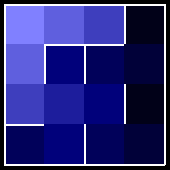

In [291]:
maze = Maze(4, 4)
wilson(maze)
maze.add_colors(color=(128, 128, 255))
display(maze.draw(cell_width=40))
maze.dump("Wilson_4x4.maze")

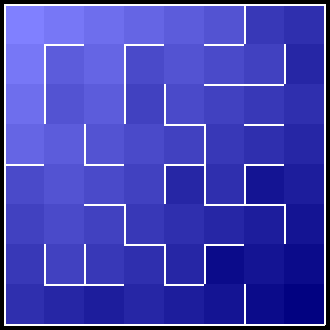

In [292]:
maze = Maze(8, 8)
wilson(maze)
maze.add_colors(color=(128, 128, 255))
display(maze.draw(cell_width=40))
maze.dump("Wilson_8x8.maze")

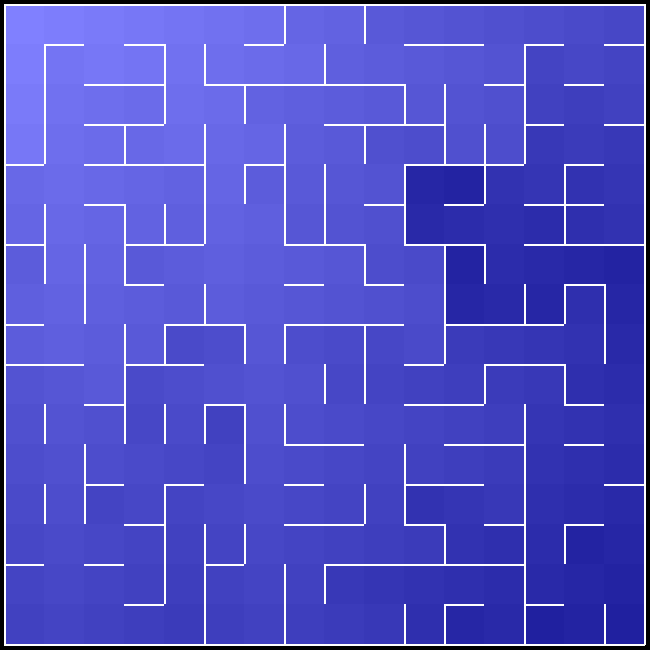

In [293]:
maze = Maze(16, 16)
wilson(maze)
maze.add_colors(color=(128, 128, 255))
display(maze.draw(cell_width=40))
maze.dump("Wilson_16x16.maze")

## Basic analysis
### Time Complexity : O(Infinity), Amortized analysis left
Mildly complicated, as it's entirely random
### Additional Space : O(N<sup>2</sup>)
For the algorithm to work, we need to check if the nodes are visited. To do this we need to maintain atleast a bit of information per node. As there are N<sup>2</sup> nodes, we need N<sup>2</sup> additional space. We also need a stack that can grow to atmost N<sup>2</sup> size (worst case).
### Bias
Guaranteed to have no bias.

In [295]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    wilson(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  9.783500
Straightways  :  18.170400
   LeftTurns  :  15.998300
  RightTurns  :  16.043000
   Junctions  :  32.923300
  Crossroads  :  7.081500


### Further analysis
This algorithm tends to create highly unbiased mazes due to its sheer randomness. However we can see that the percentage of deadends is relatively high, and that of straightways are lower. This indicates the creation of multiple passageways that tend to terminate early and not wind around each other much. There is no bias between the directions. 